# SMS Spam Detection (using python)
15/6/2018

### Basic python imports and data viz packages

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### data preprocessing packages

In [2]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

### data processing (transformation/ vectorization) packages

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

### statistical and model evaluation packages

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [5]:
sms_df = pd.read_csv("data/SMSSpamCollection", sep="\t", header=None, names=["label", "message"])
sms_df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
sms_df.groupby("label").describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [7]:
sms_df["len_char"] = sms_df["message"].apply(len)
sms_df.head()

,label,message,len_char
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Data Exploration

Text(0.5,0,'Character Length')

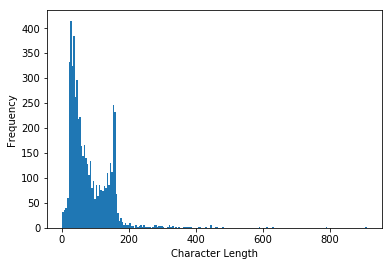

In [8]:
plt.subplot()
sms_df["len_char"].plot.hist(bins=200)
plt.xlabel("Character Length")

In [9]:
sms_df[sms_df["len_char"] > 400].sort_values("len_char", ascending=False)

,label,message,len_char
1085,ham,For me the love should start with attraction.i...,910
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2434,ham,Indians r poor but India is not a poor country...,629
1579,ham,How to Make a girl Happy? It's not at all diff...,611
2158,ham,Sad story of a Man - Last week was my b'day. M...,588
2849,ham,Sad story of a Man - Last week was my b'day. M...,588
2380,ham,"Good evening Sir, hope you are having a nice d...",482
3017,ham,"&lt;#&gt; is fast approaching. So, Wish u a v...",461
1513,ham,"Hey sweet, I was wondering when you had a mome...",458
5104,ham,A Boy loved a gal. He propsd bt she didnt mind...,446


Long messages are less likely to be spam

In [10]:
def remove_stopwords_punct(sentence):
    """
    1. Remove Punctuation
    2. Remove stopwords
    
    Returns
        A list of words without stopswords and punctuation
    """
    no_punct = "".join([char for char in sentence if char not in string.punctuation])
    # check if characters are punctuation, join back into a string and check if words are stopwords
    
    return [word for word in no_punct.split() if word not in stopwords.words("english")]

In [11]:
sms_df["clean_message"] = sms_df["message"].apply(remove_stopwords_punct)

In [12]:
ps = PorterStemmer()

In [13]:
sms_df["stem_message"] = sms_df["clean_message"].apply(lambda x: [ps.stem(i) for i in x])
sms_df

,label,message,len_char,clean_message,stem_message
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, jurong, point, crazy, Available, bugis, n...","[Go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, FA, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,"[U, dun, say, early, hor, U, c, already, say]","[U, dun, say, earli, hor, U, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, dont, think, goes, usf, lives, around...","[nah, I, dont, think, goe, usf, live, around, ..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,"[FreeMsg, Hey, darling, 3, weeks, word, back, ...","[freemsg, hey, darl, 3, week, word, back, Id, ..."
6,ham,Even my brother is not like to speak with me. ...,77,"[Even, brother, like, speak, They, treat, like...","[even, brother, like, speak, they, treat, like..."
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,"[As, per, request, Melle, Melle, Oru, Minnamin...","[As, per, request, mell, mell, oru, minnaminun..."
8,spam,WINNER!! As a valued network customer you have...,157,"[WINNER, As, valued, network, customer, select...","[winner, As, valu, network, custom, select, re..."
9,spam,Had your mobile 11 months or more? U R entitle...,154,"[Had, mobile, 11, months, U, R, entitled, Upda...","[had, mobil, 11, month, U, R, entitl, updat, l..."


# Vectorization using SKLEARN

Using the bag of words model, we:

1. Term Frequency: Count the frequency of a word in each message
2. Inverse document frequency: Weighing of counts,  more frequent tokens get lower weight
3. normalize the vector to a unit length, 

In [14]:
#from nltk.stem.porter import PorterStemmer
#from nltk.corpus import stopwords
#import string

def clean_text(sentence):
    """
    1. Remove Punctuation
    2. Remove stopwords
    3. Stems word
    
    Returns
        A list of words without stopswords and punctuation
    """
    
    no_punct = "".join([char for char in sentence if char not in string.punctuation])
    # check if characters are punctuation, join back into a string and check if words are stopwords
    
    ps = PorterStemmer()
    # stem each word into its root word
    return [ps.stem(word) for word in no_punct.split() if word not in stopwords.words("english")]

In [15]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [16]:
msg_train, msg_test, label_train, label_test = train_test_split(sms_df["message"], sms_df["label"], test_size=0.3)

# Fit data into our pipeline to create our model

In [17]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function clean_text at 0x00000231BAC39598>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [18]:
predictions = pipeline.predict(msg_test)

In [19]:
print(classification_report(label_test, predictions))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1451
       spam       1.00      0.69      0.82       221

avg / total       0.96      0.96      0.96      1672



# Using the model

In [20]:
input_message = input()
pipeline.predict([input_message])

i am a prince from nigeria


array(['ham'], dtype='<U4')

# Using a different model

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
forest_pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [23]:
forest_pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function clean_text at 0x00000231BAC39598>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [24]:
forest_predictions = forest_pipeline.predict(msg_test)

In [25]:
print(classification_report(label_test, forest_predictions))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1451
       spam       1.00      0.76      0.86       221

avg / total       0.97      0.97      0.97      1672



In [28]:
import numpy as np
print("Accuracy: ", np.mean(forest_predictions==label_test))

Accuracy:  0.9683014354066986


In [29]:
input_message = input()
forest_pipeline.predict([input_message])

i am from nigeria you want free items?


array(['ham'], dtype=object)